In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
%matplotlib inline

In [2]:
celebs = ['Irrfan_Khan', 'Jacqueline_Fernandez', 'Juhi_Chawla', 
          'Kajal_Aggarwal', 'Paresh_Rawal']

In [5]:
def prepare_image(file_name):
    img_path = 'D:\Studies\PICT\T&P\Flourisense\Facedoc\Implementation\data\celeb_faces_dataset\custom_test\\'
    img = image.load_img(img_path + file_name, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [6]:
image_name = 'Juhi_Chawla.57.jpg'
processed_test_image = prepare_image(image_name)

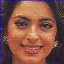

In [8]:
Image(filename = 'D:\Studies\PICT\T&P\Flourisense\Facedoc\Implementation\data\celeb_faces_dataset\custom_test\\' + image_name,
      width = 340, height = 437)

In [9]:
curr_model = tf.keras.models.load_model('models\model_73.33_Inception.h5')

In [10]:
curr_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [11]:
def recognize(image, model):
    pred_arr = model.predict(image)
    print(pred_arr)
    sns.barplot(x = celebs, y = pred_arr[0])
    plt.xticks(rotation=90, ha='right')
    name = celebs[np.where(pred_arr[0] == pred_arr[0].max())[0][0]]
    return name

[[0.00164422 0.01879639 0.94812286 0.02645655 0.00497999]]


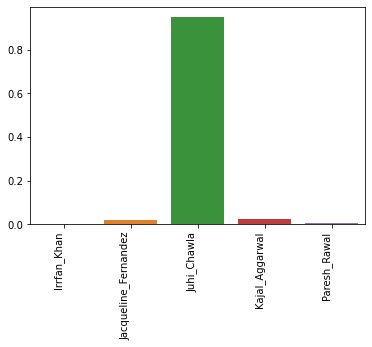

In [12]:
name = recognize(processed_test_image, curr_model)

In [13]:
name

'Juhi_Chawla'